# Untagged SIDIS ratio - change $p-\theta$ cut
last edit Sep-15, 2022

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;
# from event_selection_tools        import *;

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

## Binning

In [3]:
z_bins   = np.arange(0.3,0.85,0.05)
z_widths = 0.01*np.ones(len(z_bins))
x_bins   = np.linspace(0.2,0.6,11)
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2
print('x bins:',x_bins)
print('z bins:',z_bins)
for z_bin,z_width in zip(z_bins,z_widths):
    z_min,z_max = z_bin-z_width, z_bin+z_width
    print('%.3f < z < %.3f:'%(z_min,z_max))
var_label = "standing proton x"
var    = 'xB'
xlabel = "Bjorken $x$"    

x bins: [0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52 0.56 0.6 ]
z bins: [0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8 ]
0.290 < z < 0.310:
0.340 < z < 0.360:
0.390 < z < 0.410:
0.440 < z < 0.460:
0.490 < z < 0.510:
0.540 < z < 0.560:
0.590 < z < 0.610:
0.640 < z < 0.660:
0.690 < z < 0.710:
0.740 < z < 0.760:
0.790 < z < 0.810:


In [4]:
Nruns = -1

# (1) Load data and extract cross-section ratio, with $p-\theta$ cut applied in multiple subsets

In [5]:
e_e_pi,_,_  = load_SIDIS_data( Nruns = Nruns, do_e_e_pi_n=False, do_e_e_pi_FreeP=False, fdebug=0, )
e_e_pi_pass_cuts,_,_,_ = apply_further_selection_cuts_to_data();
data_path = '/Users/erezcohen/Desktop/data/BAND/Results/p_theta_cut_subsets/'
suffix    = 'p_theta_cut_in_multiple_subsets'
prefix    = 'Untagged_SIDIS_ratio_'

extract_SIDIS_ratio(df_dict  = e_e_pi_pass_cuts,
                    data_path= data_path,
                    x_var    = var ,x_bins   = x_bins,z_bins   = z_bins,z_widths = z_widths,                                               
                    W_min    = 2.5,                    
                    prefix   = prefix,suffix   = suffix)

Done loading files.
Applying selection cuts not previously imposed
(1) Applying cuts to d(e,e'π) data
Apply a π+/π- acceptance matching cut on the in p-theta plane
Applying p-theta on cut for piplus on 17964852 events
Subdividing into 35 subsets up to 500000 events
subset 0 of index 0-499999
subset 1 of index 500000-999999
subset 2 of index 1000000-1499999
subset 3 of index 1500000-1999999
subset 4 of index 2000000-2499999
subset 5 of index 2500000-2999999
subset 6 of index 3000000-3499999
subset 7 of index 3500000-3999999
subset 8 of index 4000000-4499999
subset 9 of index 4500000-4999999
subset 10 of index 5000000-5499999
subset 11 of index 5500000-5999999
subset 12 of index 6000000-6499999
subset 13 of index 6500000-6999999
subset 14 of index 7000000-7499999
subset 15 of index 7500000-7999999
subset 16 of index 8000000-8499999
subset 17 of index 8500000-8999999
subset 18 of index 9000000-9499999
subset 19 of index 9500000-9999999
subset 20 of index 10000000-10499999
subset 21 of ind

/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:286: RuntimeWarning: invalid value encountered in double_scalars
  R     = Npips_in_bin / np.max([Npims_in_bin,cutoff])
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:287: RuntimeWarning: invalid value encountered in double_scalars
  R_err = R * np.sqrt( np.square(Npips_in_bin_err/np.max([Npips_in_bin,cutoff]))
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:288: RuntimeWarning: invalid value encountered in double_scalars
  + np.square(Npims_in_bin_err/np.max([Npims_in_bin,cutoff]) ) )


In [6]:
len(e_e_pi_pass_cuts['piplus'])

14756993

# (2) Load data and extract cross-section ratio, with $p-\theta$ cut applied in a single subset

In [7]:
# ----------------------- #
def apply_p_theta_acceptance_cut_single_set( df_dict=None,
                                 NeventsMax=-1,
                                 NMaxPerSubset = 500000,
                                 fdebug=1):
    '''
        df_dict_after_cut = apply_p_theta_acceptance_cut(df_dict)
        
        Apply a π+/π- acceptance matching cut on the in p-\theta plane
        last update Sep-15, 2022
        
    '''
    import numpy as np
    print("Apply a π+/π- acceptance matching cut on the in p-theta plane")
    df_dict_after_cut = dict()
        
    for pi_ch in pi_charge_names:
        
        if NeventsMax > 0: NeventsMax = np.min( [NeventsMax, len(df_dict[pi_ch])] )
        else:              NeventsMax = len(df_dict[pi_ch])
        df = df_dict[pi_ch][0:NeventsMax]
        if fdebug: print('Applying p-theta on cut for '+pi_ch+' on %d events'%NeventsMax)
        good_indices = np.array([])
        for sector in range(1,7):#{
            df_in_sector   = df[df.pi_DC_sector == sector]
            print(len(df_in_sector),'in sector',sector)
            theta_min_pi   = pi_min_theta_cut( pi_charge = 'any', sector=sector, p=np.array(df_in_sector.pi_P) )
            good_indices_in_sector = []
            good_indices_in_sector = df_in_sector[ df_in_sector.pi_Theta*r2d > theta_min_pi ].index
            good_indices = np.concatenate([good_indices,good_indices_in_sector])
        #}
        good_indices = np.unique(good_indices)
        df_after_cut = df.loc[good_indices]

        df_dict_after_cut[pi_ch] = df_after_cut
    return df_dict_after_cut
# ----------------------- #

In [8]:


# ----------------------- #
def apply_cuts_to_e_e_pi_single_set(fdebug=2,
                         NeventsMax=-1,
                         NMaxPerSubset = 500000,
                         doAcceptanceMatchingCut = True,
                         doApply_minPn_cut       = True,
                         doApply_Mx_cut          = True):#{
    '''
    e_e_pi_pass_cuts = apply_cuts_to_e_e_pi(fdebug,
                                         NeventsMax,
                                         NMaxPerSubset,
                                         doAcceptanceMatchingCut,
                                         doApply_minPn_cut,
                                         doApply_Mx_cut)
                                         
    Sep-15, 2022
    '''
    # d(e,e'\pi) SIDIS data
    global e_e_pi #, e_e_pi_pass_cuts

    
    if doAcceptanceMatchingCut:#{
        e_e_pi_after_p_theta_cut = apply_p_theta_acceptance_cut_single_set( e_e_pi,
                                                                NeventsMax=NeventsMax,
                                                                NMaxPerSubset=NMaxPerSubset,
                                                                fdebug=fdebug )
    #}
    else:#{
        e_e_pi_after_p_theta_cut = dict()
        for pi_ch,pi_print in zip(pi_charge_names,pi_prints):#{
            df = e_e_pi[pi_ch]
            e_e_pi_after_p_theta_cut[pi_ch] = df[0:NeventsMax]
        #}
    #}

    if doApply_Mx_cut:  #{
        e_e_pi_after_Mx_cut      = apply_Mx_cut( e_e_pi_after_p_theta_cut )
    #}
    else: #{
        e_e_pi_after_Mx_cut      = e_e_pi_after_p_theta_cut
    #}

    e_e_pi_after_Kinematical_cuts = apply_Kinematical_cuts( e_e_pi_after_Mx_cut )
    e_e_pi_pass_cuts         = e_e_pi_after_Kinematical_cuts;

    Nevents      = dict()
    frac_Nevents = dict()
    for pi_ch,pi_print in zip(pi_charge_names,pi_prints):#{
        print('(e,e',pi_print,')')
        Nevents,frac_Nevents = dict(),dict()
        if NeventsMax < 0:
            Nevents,frac_Nevents = get_Nevents(pi_ch, 'original',  e_e_pi, Nevents, frac_Nevents);
        else:
            Nevents[pi_ch + ' original cut'] = NeventsMax
            frac_Nevents[pi_ch + ' original cut'] = 1

        Nevents,frac_Nevents = get_Nevents(pi_ch, 'p-theta',      e_e_pi_after_p_theta_cut,      Nevents, frac_Nevents);
        Nevents,frac_Nevents = get_Nevents(pi_ch, 'Mx',           e_e_pi_after_Mx_cut,           Nevents, frac_Nevents);
        Nevents,frac_Nevents = get_Nevents(pi_ch, 'Kinematical',  e_e_pi_after_Kinematical_cuts, Nevents, frac_Nevents);
        
        # add beam-charge weight
        runnumbers = np.array(e_e_pi_pass_cuts[pi_ch].runnum).astype(int);
        e_e_pi_pass_cuts[pi_ch]['weight'] = runnum_weight( runnumbers )
    #}
    print(' ')
    return e_e_pi_pass_cuts
#}



In [9]:

# ----------------------- #
def apply_further_selection_cuts_to_data_single_set(fdebug=2,
                                         NeventsMax=-1,
                                         NMaxPerSubset = 500000,
                                         doAcceptanceMatchingCut = True,
                                         doApply_minPn_cut       = True,
                                         doApply_Mx_cut          = True,):#{
    '''
    e_e_pi_pass_cuts, e_e_pi_n_pass_cuts, e_e_pi_GEMC_pass_cuts = apply_further_selection_cuts_to_data(fdebug=2)
    last edit Aug-26, 2022
    
    Apply selection cuts not previously imposed
    
    The cuts applied for d(e,e'π), d(e,e'πn) and p(e,e'π) events:
    1. pi+/pi- acceptance matching cut in p-theta plane
    2. Missing mass cut
    3. ...
    
    
    input:
    --------
    doApply_*_cut      flag to apply the cut or not
    
    return:
    --------
    e_e_pi_pass_cuts, e_e_pi_n_pass_cuts, e_e_pi_FreeP_pass_cuts, e_e_pi_GEMC_pass_cuts
    
    '''
    global e_e_pi, e_e_pi_n, e_e_pi_FreeP, e_e_pi_GEMC
    # global e_e_pi_pass_cuts,
    global e_e_pi_n_pass_cuts, e_e_pi_FreeP_pass_cuts, e_e_pi_GEMC_pass_cuts
    
    
    # (e,e'\pi n) SIDIS data complete this -  need to add sector ID in the (e,e'\pi n) data
    print('Applying selection cuts not previously imposed')
    
    # print number of events retained on every cut
    # if fdebug < 1: return
    Nevents      = dict()
    frac_Nevents = dict()
    
    # (1) d(e,e'π) Data
    if (e_e_pi=={}) is False:#{
        print("(1) Applying cuts to d(e,e'π) data")
        e_e_pi_pass_cuts = apply_cuts_to_e_e_pi_single_set(fdebug, NeventsMax, NMaxPerSubset,
                                                doAcceptanceMatchingCut,
                                                doApply_minPn_cut,
                                                doApply_Mx_cut)
    # (2) d(e,e'πn) data
    if (e_e_pi_n=={}) is False:#{
        print("(2) Applying cuts to d(e,e'πn) data")
        e_e_pi_n_pass_cuts = apply_cuts_to_e_e_pi_n(fdebug, NeventsMax, NMaxPerSubset,
                                                    doAcceptanceMatchingCut,
                                                    doApply_minPn_cut,
                                                    doApply_Mx_cut)
    # (3) p(e,e'π) Data
    if (e_e_pi_FreeP=={}) is False:#{
        print("(3) Applying cuts to p(e,e'π) data")
        e_e_pi_FreeP_pass_cuts = apply_cuts_to_e_e_pi_FreeP(fdebug, NeventsMax,NMaxPerSubset,
                                                    doAcceptanceMatchingCut,
                                                    doApply_minPn_cut,
                                                    doApply_Mx_cut)
    # (4) MC
    if (e_e_pi_GEMC=={}) is False:#{
        print('(4) MC')
        e_e_pi_GEMC_pass_cuts = apply_cuts_to_e_e_pi_GEMC(fdebug, NeventsMax, NMaxPerSubset,
                                         doAcceptanceMatchingCut,
                                         doApply_minPn_cut,
                                         doApply_Mx_cut)
    print('Done applying event-selection cuts')
    return e_e_pi_pass_cuts, e_e_pi_n_pass_cuts, e_e_pi_FreeP_pass_cuts, e_e_pi_GEMC_pass_cuts
#}
# ----------------------- #


In [10]:
load_SIDIS_data( Nruns = Nruns, do_e_e_pi_n=False, do_e_e_pi_FreeP=False, fdebug=0, )
e_e_pi_pass_cuts_single_set,_,_,_ = apply_further_selection_cuts_to_data_single_set();
data_path = '/Users/erezcohen/Desktop/data/BAND/Results/p_theta_cut_subsets/'
suffix    = 'p_theta_cut_in_single_set'
prefix    = 'Untagged_SIDIS_ratio_'
extract_SIDIS_ratio(df_dict  = e_e_pi_pass_cuts_single_set,
                    data_path= data_path,
                    x_var    = var ,x_bins   = x_bins,z_bins   = z_bins,z_widths = z_widths,                                               
                    W_min    = 2.5,                    
                    prefix   = prefix,suffix   = suffix)

Done loading files.
Applying selection cuts not previously imposed
(1) Applying cuts to d(e,e'π) data
Apply a π+/π- acceptance matching cut on the in p-theta plane
Applying p-theta on cut for piplus on 17964852 events
3052138 in sector 1
2974253 in sector 2
2976045 in sector 3
2965198 in sector 4
3019301 in sector 5
2977917 in sector 6
Applying p-theta on cut for piminus on 7459373 events
1262143 in sector 1
1247504 in sector 2
1226771 in sector 3
1238158 in sector 4
1222702 in sector 5
1262095 in sector 6
Apply a cut on the missing mass of a (e,e'π) reaction: 1.3<Mx<5.0 GeV/c2
(e,e π+ )
17964852 events after original cut (100.0 %)
17963641 events after p-theta cut (100.0 %)
17212617 events after Mx cut (95.8 %)
17174294 events after Kinematical cut (95.6 %)
(e,e π- )
7459373 events after original cut (100.0 %)
7459352 events after p-theta cut (100.0 %)
7168963 events after Mx cut (96.1 %)
7152408 events after Kinematical cut (95.9 %)
 
Done applying event-selection cuts
saved /Users/e

In [11]:
len(e_e_pi_pass_cuts_single_set['piplus'])

17174294

## Comparison

In [12]:
SIDIS_res = dict()
prefix = 'Untagged_SIDIS_ratio_'
for suffix in ['p_theta_cut_in_multiple_subsets','p_theta_cut_in_single_set']:
    SIDIS_res[suffix] = load_SIDIS_ratio(data_path= data_path,
                                         prefix = prefix, suffix = suffix, 
                                         doPlotResults=False)
print('Done.')

Reading files from /Users/erezcohen/Desktop/data/BAND/Results/p_theta_cut_subsets/
reading Untagged_SIDIS_ratio_Zmin0.440_Zmean_pips0.450_pims0.450_Zmax0.460p_theta_cut_in_multiple_subsets.csv
reading Untagged_SIDIS_ratio_Zmin0.690_Zmean_pips0.700_pims0.700_Zmax0.710p_theta_cut_in_multiple_subsets.csv
reading Untagged_SIDIS_ratio_Zmin0.790_Zmean_pips0.800_pims0.800_Zmax0.810p_theta_cut_in_multiple_subsets.csv
reading Untagged_SIDIS_ratio_Zmin0.590_Zmean_pips0.600_pims0.600_Zmax0.610p_theta_cut_in_multiple_subsets.csv
reading Untagged_SIDIS_ratio_Zmin0.290_Zmean_pips0.305_pims0.305_Zmax0.310p_theta_cut_in_multiple_subsets.csv
reading Untagged_SIDIS_ratio_Zmin0.740_Zmean_pips0.750_pims0.750_Zmax0.760p_theta_cut_in_multiple_subsets.csv
reading Untagged_SIDIS_ratio_Zmin0.640_Zmean_pips0.650_pims0.650_Zmax0.660p_theta_cut_in_multiple_subsets.csv
reading Untagged_SIDIS_ratio_Zmin0.390_Zmean_pips0.400_pims0.400_Zmax0.410p_theta_cut_in_multiple_subsets.csv
reading Untagged_SIDIS_ratio_Zmin0.49

In [13]:
z_arr,z_err_arr,R_arr,R_errup_arr,R_errdw_arr = dict(),dict(),dict(),dict(),dict()
for suffix in ['p_theta_cut_in_multiple_subsets','p_theta_cut_in_single_set']:
    # print(suffix)
    results = SIDIS_res[suffix]
    z_arr[suffix],z_err_arr[suffix],R_arr[suffix],R_errup_arr[suffix],R_errdw_arr[suffix] = [],[],[],[],[]
    for key in results.keys():
        # print(key)
        z_min = float(key[4:9])
        z_max = float(key[-4:])

        # print(z_min,'<z<',z_max)
        res_x034 = results[key][np.abs(results[key]['$x_B$']-0.34)<0.02]
        # print(results[key])
        R,dR_up,dR_dw = float(res_x034['$R$']),float(res_x034['$\Delta R_{+}$']),float(res_x034['$\Delta R_{+}$'])
        # print(R,dR_up,dR_dw)
        
        R_arr[suffix].append( R )
        R_errup_arr[suffix].append( dR_up )
        R_errdw_arr[suffix].append( dR_dw )        

        z_arr[suffix].append( (z_max + z_min)/2 )
        z_err_arr[suffix].append( (z_max - z_min)/2 )
        
print('Done.')

Done.


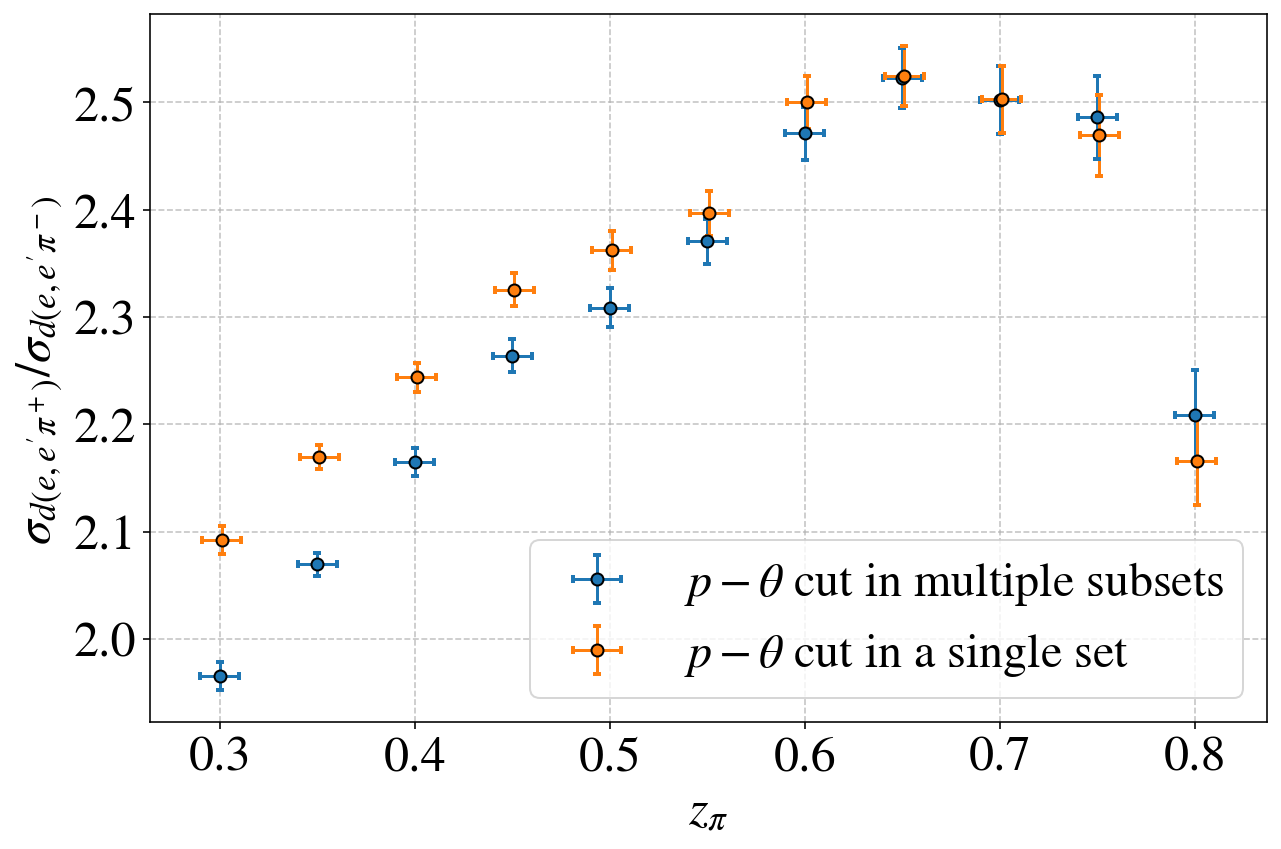

In [14]:
fig = plt.figure(figsize=(9,6), tight_layout=True)
ax = fig.add_subplot(1,1,1)

for suffix,sufname,sufidx in zip(['p_theta_cut_in_multiple_subsets','p_theta_cut_in_single_set'],
                                 ['$p-\\theta$ cut in multiple subsets','$p-\\theta$ cut in a single set'],
                                 [0,1]):
    plt.errorbar(x=np.array(z_arr[suffix])+sufidx*0.001, xerr=z_err_arr[suffix],
                 y=R_arr[suffix], yerr=(R_errup_arr[suffix],R_errdw_arr[suffix]),
                 marker='o',markeredgecolor='k',linestyle='None',
                 label=sufname, capthick=2, capsize=2)

set_axes(ax,'$z_\\pi$',
             "$\\sigma_{d(e,e'\\pi^+)}/\\sigma_{d(e,e'\\pi^-)}$ ",
             do_add_grid=True, do_add_legend=True)
ax.legend(loc='lower right',fontsize=24);

# Plot difference between the data-sets with one/multiple subsets for $p-\theta$ cut

π+
17964852 events in  before $p-\theta$ cut
14756993 events in  $p-\theta$ cut in multiple subsets
17174294 events in  $p-\theta$ cut in a single set
π-
7459373 events in  before $p-\theta$ cut
6709018 events in  $p-\theta$ cut in multiple subsets
7152408 events in  $p-\theta$ cut in a single set



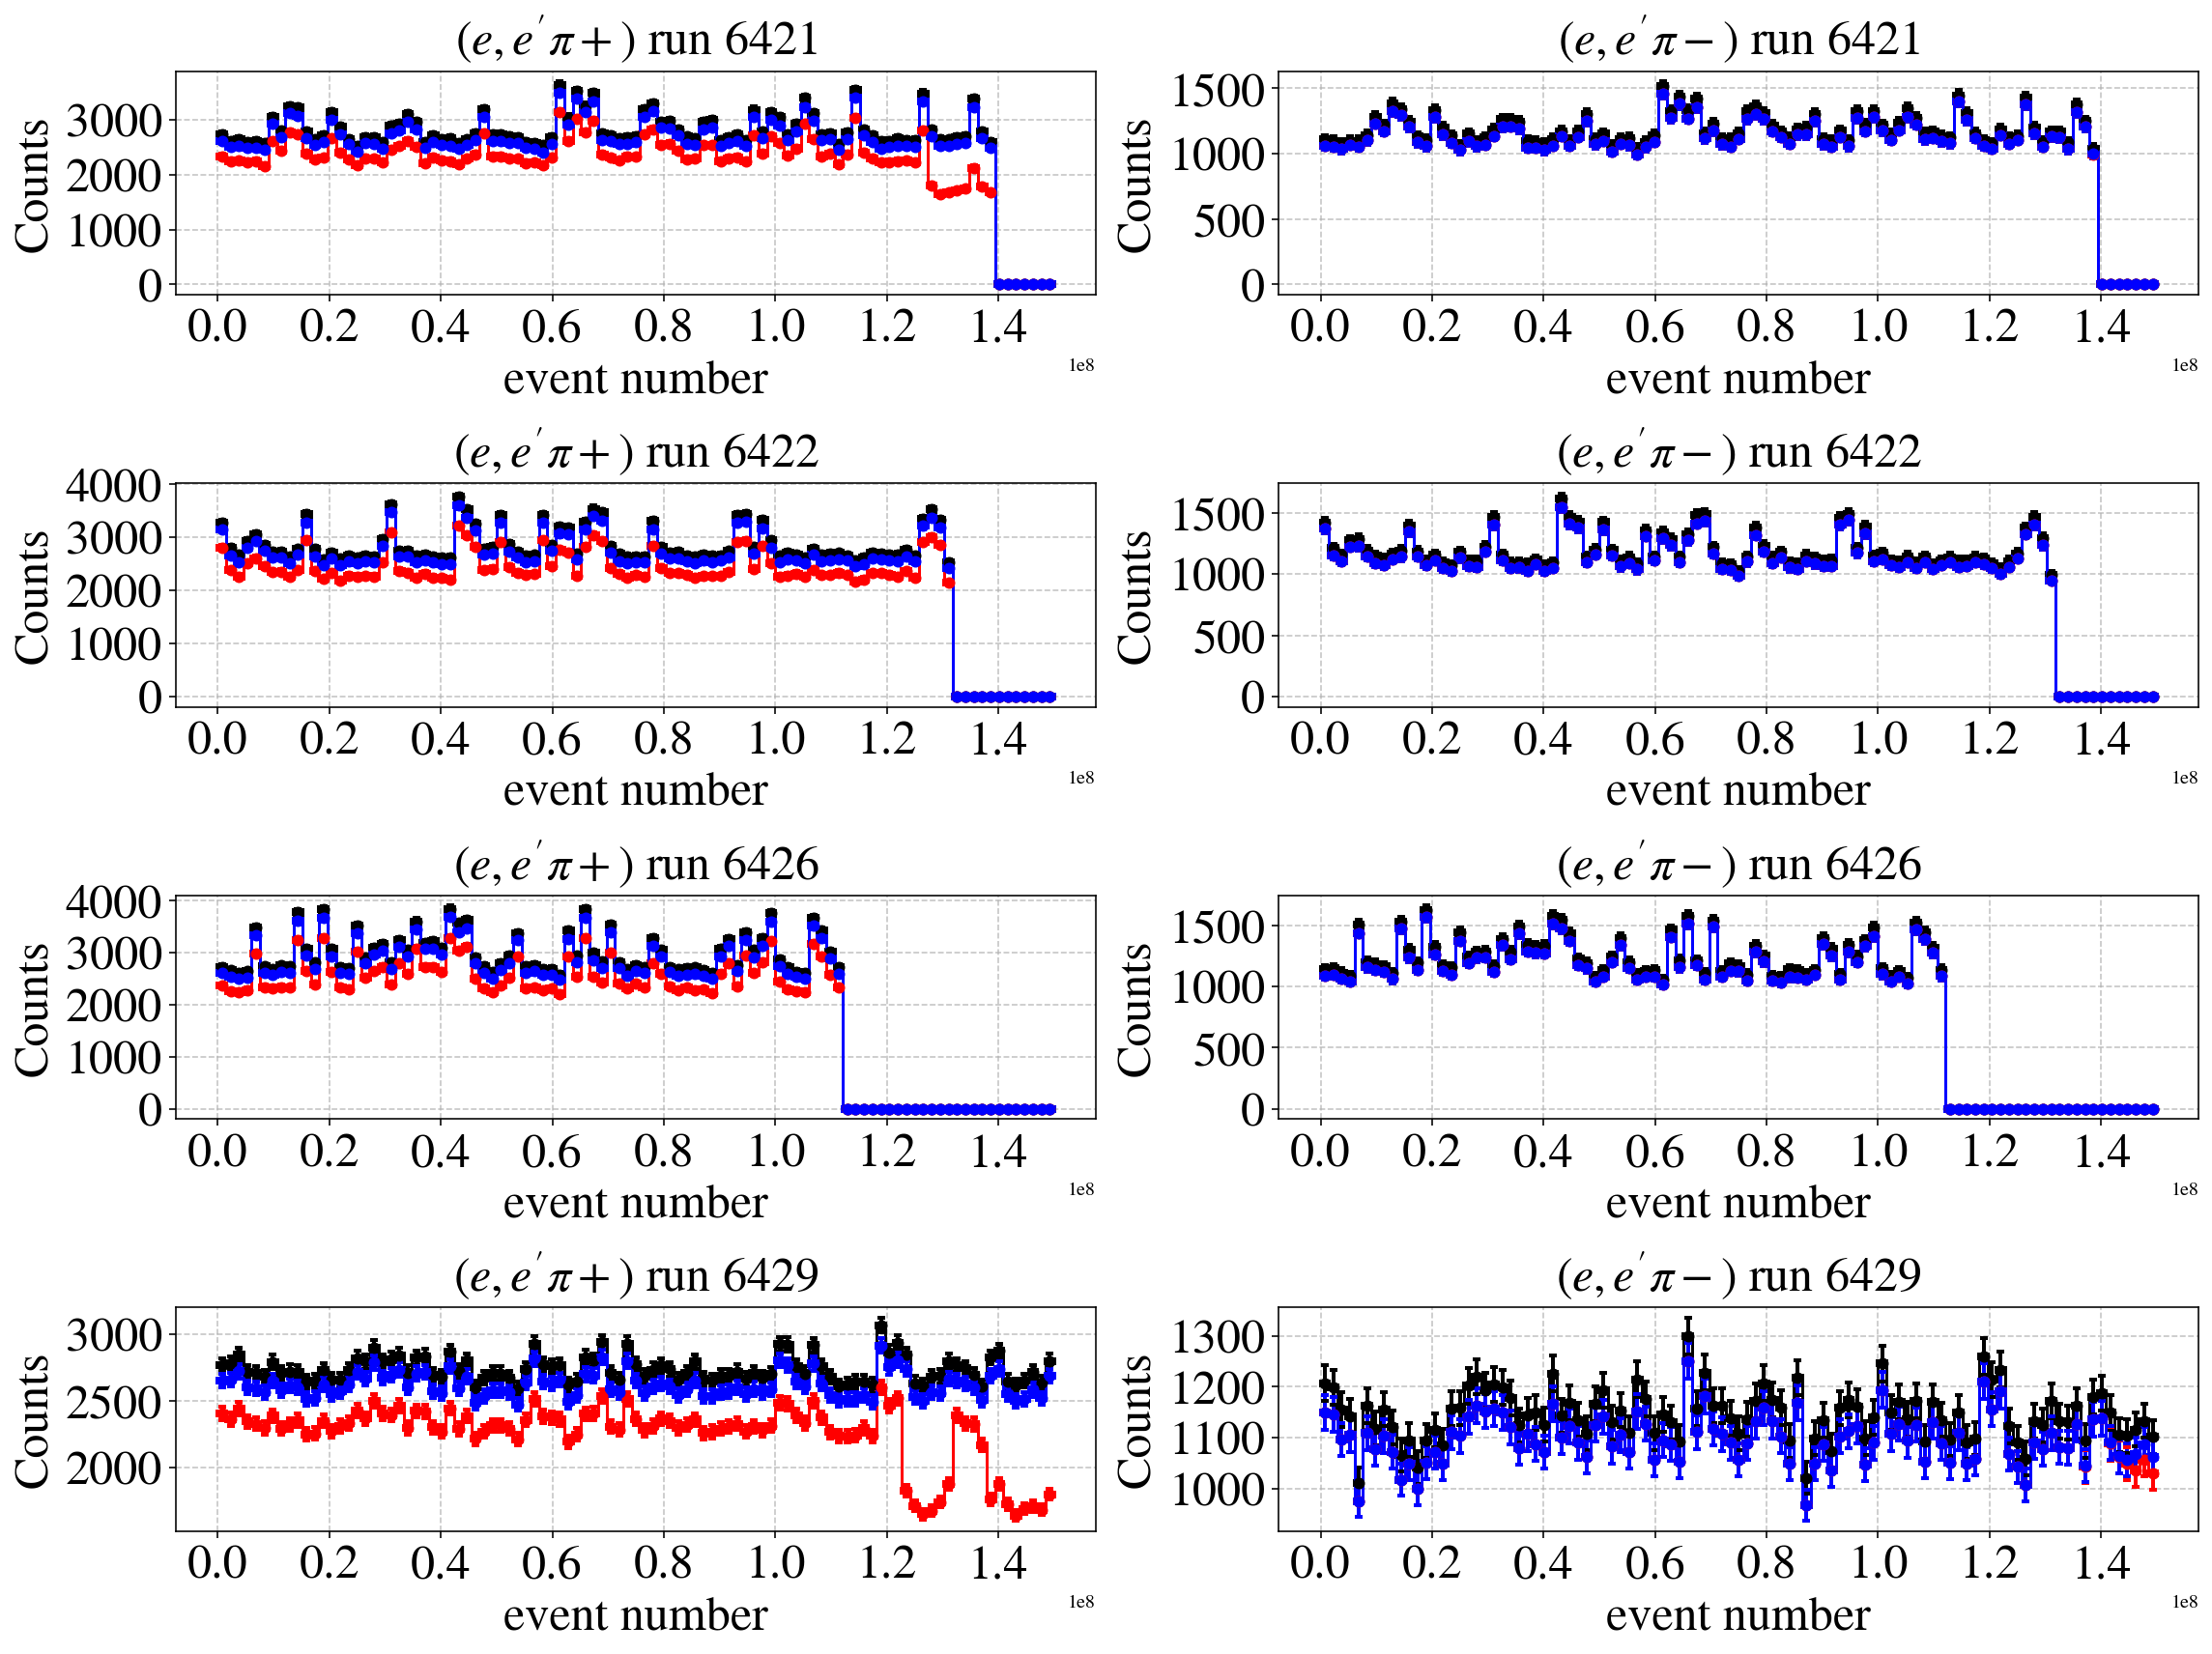

In [15]:
bins = np.linspace(0,1.5e8,100)
fig = plt.figure(figsize=(16,12), tight_layout=True)

for runnum,run_idx in zip([6421,6422,6426,6429],[0,1,2,3]):
    for pi_ch,pi_color,pi_idx,pi_print in zip(pi_charge_names,pi_colors,[1,2],pi_prints):
        if run_idx==0: print(pi_print)
        ax = fig.add_subplot(4, 2, 2*run_idx + pi_idx)
        for df_dict,sufname,sufidx,color in zip([e_e_pi, e_e_pi_pass_cuts, e_e_pi_pass_cuts_single_set],                                     
                                                ['before $p-\\theta$ cut','$p-\\theta$ cut in multiple subsets','$p-\\theta$ cut in a single set'],
                                                [0,1,1],
                                                ['k','r','b']):
            df = df_dict[pi_ch]
            if run_idx==0: print(len(df),'events in ',sufname)
            df = df[df.runnum == runnum]
            plot_step_hist(df.evnum, bins=bins, color=color, label=sufname)

        set_axes(ax,'event number',
                 "Counts",title= "$(e,e'"+pi_print+"$) run %d"%runnum,
                 do_add_grid=True, 
                 do_add_legend=False if run_idx==1 and pi_idx==1 else False)
        
    if run_idx==0: print()
# ax.legend(loc='lower right',fontsize=24);